In [1]:
import sqlite3
import pandas as pd
from pandasql import sqldf

In [2]:
con= sqlite3.connect(r"C:\Users\amytu\Downloads\archive\sqlite-sakila.db")

In [3]:
rentals = pd.read_sql_query('''SELECT DISTINCT f.film_id,
f.title,
f.release_year,
c.name as genre,
f.rating, COUNT(r.rental_date) as number_of_rentals,
f.rental_duration, ROUND(AVG(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date))) as ave_length_rental,
f.rental_rate,
f.replacement_cost  
FROM film f 
LEFT JOIN film_category fc on fc.film_id = f.film_id  
LEFT JOIN category c on c.category_id = fc.category_id 
LEFT JOIN inventory i on i.film_id = f.film_id 
LEFT JOIN rental r on r.inventory_id = i.inventory_id
GROUP BY f.film_id''', con)

con.close()

In [4]:
rentals

,film_id,title,release_year,genre,rating,number_of_rentals,rental_duration,ave_length_rental,rental_rate,replacement_cost
0,1,ACADEMY DINOSAUR,2006,Documentary,PG,23,6,5.0,0.99,20.99
1,2,ACE GOLDFINGER,2006,Horror,G,7,3,6.0,4.99,12.99
2,3,ADAPTATION HOLES,2006,Documentary,NC-17,12,7,3.0,2.99,18.99
3,4,AFFAIR PREJUDICE,2006,Horror,G,23,5,5.0,2.99,26.99
4,5,AFRICAN EGG,2006,Family,G,12,6,7.0,2.99,22.99
...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,2006,Documentary,G,7,6,5.0,0.99,9.99
996,997,YOUTH KICK,2006,Music,NC-17,6,4,6.0,0.99,14.99
997,998,ZHIVAGO CORE,2006,Horror,NC-17,9,6,6.0,0.99,10.99
998,999,ZOOLANDER FICTION,2006,Children,R,17,5,6.0,2.99,28.99


## Cleaning first data set

In [5]:
rentals.shape

(1000, 10)

In [6]:
rentals.head(10)

,film_id,title,release_year,genre,rating,number_of_rentals,rental_duration,ave_length_rental,rental_rate,replacement_cost
0,1,ACADEMY DINOSAUR,2006,Documentary,PG,23,6,5.0,0.99,20.99
1,2,ACE GOLDFINGER,2006,Horror,G,7,3,6.0,4.99,12.99
2,3,ADAPTATION HOLES,2006,Documentary,NC-17,12,7,3.0,2.99,18.99
3,4,AFFAIR PREJUDICE,2006,Horror,G,23,5,5.0,2.99,26.99
4,5,AFRICAN EGG,2006,Family,G,12,6,7.0,2.99,22.99
5,6,AGENT TRUMAN,2006,Foreign,PG,21,3,6.0,2.99,17.99
6,7,AIRPLANE SIERRA,2006,Comedy,PG-13,15,6,5.0,4.99,28.99
7,8,AIRPORT POLLOCK,2006,Horror,R,18,6,5.0,4.99,15.99
8,9,ALABAMA DEVIL,2006,Horror,PG-13,12,3,6.0,2.99,21.99
9,10,ALADDIN CALENDAR,2006,Sports,NC-17,23,6,5.0,4.99,24.99


In [7]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   film_id            1000 non-null   int64  
 1   title              1000 non-null   object 
 2   release_year       1000 non-null   object 
 3   genre              1000 non-null   object 
 4   rating             1000 non-null   object 
 5   number_of_rentals  1000 non-null   int64  
 6   rental_duration    1000 non-null   int64  
 7   ave_length_rental  958 non-null    float64
 8   rental_rate        1000 non-null   float64
 9   replacement_cost   1000 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
rentals.isnull().sum()

film_id               0
title                 0
release_year          0
genre                 0
rating                0
number_of_rentals     0
rental_duration       0
ave_length_rental    42
rental_rate           0
replacement_cost      0
dtype: int64

In [9]:
rentals. nunique()

film_id              1000
title                1000
release_year            1
genre                  16
rating                  5
number_of_rentals      32
rental_duration         5
ave_length_rental       6
rental_rate             3
replacement_cost       21
dtype: int64

## Pulling and Cleaning Second Dataset

In [63]:
con= sqlite3.connect(r"C:\Users\amytu\Downloads\archive\sqlite-sakila.db")

In [67]:
actors = pd.read_sql_query('''SELECT a.first_name || ' ' || a.last_name as actor_name,
f.title,
f.film_id
FROM actor a  
LEFT JOIN film_actor fa on fa.actor_id = a.actor_id 
LEFT JOIN film f on f.film_id = fa.film_id''', con)
con.close()

In [65]:
actors

,actor_name,title,film_id
0,PENELOPE GUINESS,ACADEMY DINOSAUR,1
1,PENELOPE GUINESS,ANACONDA CONFESSIONS,23
2,PENELOPE GUINESS,ANGELS LIFE,25
3,PENELOPE GUINESS,BULWORTH COMMANDMENTS,106
4,PENELOPE GUINESS,CHEAPER CLYDE,140
...,...,...,...
5457,THORA TEMPLE,TELEGRAPH VOYAGE,879
5458,THORA TEMPLE,TROJAN TOMORROW,912
5459,THORA TEMPLE,VIRGINIAN PLUTO,945
5460,THORA TEMPLE,WARDROBE PHANTOM,958


In [13]:
actors.shape

(5462, 2)

In [14]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   actor_name  5462 non-null   object
 1   title       5462 non-null   object
dtypes: object(2)
memory usage: 85.5+ KB


In [15]:
actors.head(10)

,actor_name,title
0,PENELOPE GUINESS,ACADEMY DINOSAUR
1,PENELOPE GUINESS,ANACONDA CONFESSIONS
2,PENELOPE GUINESS,ANGELS LIFE
3,PENELOPE GUINESS,BULWORTH COMMANDMENTS
4,PENELOPE GUINESS,CHEAPER CLYDE
5,PENELOPE GUINESS,COLOR PHILADELPHIA
6,PENELOPE GUINESS,ELEPHANT TROJAN
7,PENELOPE GUINESS,GLEAMING JAWBREAKER
8,PENELOPE GUINESS,HUMAN GRAFFITI
9,PENELOPE GUINESS,KING EVOLUTION


In [16]:
actors.isnull().sum()

actor_name    0
title         0
dtype: int64

In [17]:
actors.nunique()

actor_name    199
title         997
dtype: int64

## Pulling and Cleaning Third Dataset

In [57]:
con= sqlite3.connect(r"C:\Users\amytu\Downloads\archive\sqlite-sakila.db")

In [60]:
staff = pd.read_sql_query('''SELECT s.first_name  || ' ' || s.last_name as employee_name,
r.rental_date,
f.rental_rate,
c.first_name || ' ' || c.last_name as customer_name,
r.rental_id,
f.film_id
FROM staff s 
LEFT JOIN rental r on r.staff_id = s.staff_id
LEFT JOIN customer c on c.customer_id = r.customer_id 
LEFT JOIN inventory i on i.inventory_id = r.inventory_id 
LEFT JOIN film f on f.film_id = i.film_id''', con )
con.close()

In [59]:
staff

,employee_name,rental_date,rental_rate,customer_name,rental_id,film_id
0,Mike Hillyer,2005-05-24 22:53:30.000,2.99,CHARLOTTE HUNTER,1,80
1,Mike Hillyer,2005-05-24 22:54:33.000,2.99,TOMMY COLLAZO,2,333
2,Mike Hillyer,2005-05-24 23:03:39.000,2.99,MANUEL MURRELL,3,373
3,Mike Hillyer,2005-05-24 23:05:21.000,2.99,DELORES HANSEN,5,450
4,Mike Hillyer,2005-05-24 23:08:07.000,0.99,NELSON CHRISTENSON,6,613
...,...,...,...,...,...,...
16039,Jon Stephens,2005-08-23 22:20:26.000,2.99,JOSEPHINE GOMEZ,16041,895
16040,Jon Stephens,2005-08-23 22:21:03.000,4.99,KARL SEAL,16043,846
16041,Jon Stephens,2005-08-23 22:26:47.000,0.99,DENISE KELLY,16046,951
16042,Jon Stephens,2005-08-23 22:42:48.000,0.99,GRACE ELLIS,16047,452


In [21]:
staff.shape

(16044, 4)

In [22]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employee_name  16044 non-null  object 
 1   rental_date    16044 non-null  object 
 2   rental_rate    16044 non-null  float64
 3   customer_name  16044 non-null  object 
dtypes: float64(1), object(3)
memory usage: 501.5+ KB


In [23]:
staff.head(10)

,employee_name,rental_date,rental_rate,customer_name
0,Mike Hillyer,2005-05-24 22:53:30.000,2.99,CHARLOTTE HUNTER
1,Mike Hillyer,2005-05-24 22:54:33.000,2.99,TOMMY COLLAZO
2,Mike Hillyer,2005-05-24 23:03:39.000,2.99,MANUEL MURRELL
3,Mike Hillyer,2005-05-24 23:05:21.000,2.99,DELORES HANSEN
4,Mike Hillyer,2005-05-24 23:08:07.000,0.99,NELSON CHRISTENSON
5,Mike Hillyer,2005-05-25 00:00:40.000,4.99,ELLEN SIMPSON
6,Mike Hillyer,2005-05-25 00:22:55.000,4.99,RAYMOND MCWHORTER
7,Mike Hillyer,2005-05-25 00:31:15.000,0.99,THEODORE CULP
8,Mike Hillyer,2005-05-25 00:39:22.000,4.99,RONALD WEINER
9,Mike Hillyer,2005-05-25 01:06:36.000,2.99,ISAAC OGLESBY


In [24]:
staff.tail(10)

,employee_name,rental_date,rental_rate,customer_name
16034,Jon Stephens,2005-08-23 22:06:15.000,2.99,MAUREEN LITTLE
16035,Jon Stephens,2005-08-23 22:12:44.000,2.99,FRANCIS SIKES
16036,Jon Stephens,2005-08-23 22:13:04.000,4.99,JANET PHILLIPS
16037,Jon Stephens,2005-08-23 22:18:51.000,0.99,LORI WOOD
16038,Jon Stephens,2005-08-23 22:19:33.000,4.99,VANESSA SIMS
16039,Jon Stephens,2005-08-23 22:20:26.000,2.99,JOSEPHINE GOMEZ
16040,Jon Stephens,2005-08-23 22:21:03.000,4.99,KARL SEAL
16041,Jon Stephens,2005-08-23 22:26:47.000,0.99,DENISE KELLY
16042,Jon Stephens,2005-08-23 22:42:48.000,0.99,GRACE ELLIS
16043,Jon Stephens,2005-08-23 22:50:12.000,0.99,PHILIP CAUSEY


In [25]:
staff.isnull().sum()

employee_name    0
rental_date      0
rental_rate      0
customer_name    0
dtype: int64

In [26]:
staff.nunique()

employee_name        2
rental_date      15815
rental_rate          3
customer_name      599
dtype: int64

In [27]:
staff.describe()

,rental_rate
count,16044.000000
mean,2.942630
std,1.649678
min,0.990000
25%,0.990000
50%,2.990000
75%,4.990000
max,4.990000


In [28]:
2.94 + 1.65

4.59

In [29]:
2.94 - 1.65

1.29

## Functions

In [30]:
def sales(s):
    if s < 1.29:
        return("Below Average")
    elif s > 2.94:
        return("Above Average")
    elif s == 0:
        return("No Sales")
    else:
        return("Average")

In [31]:
staff['sales_rating'] = staff.rental_rate.apply(sales)
staff

,employee_name,rental_date,rental_rate,customer_name,sales_rating
0,Mike Hillyer,2005-05-24 22:53:30.000,2.99,CHARLOTTE HUNTER,Above Average
1,Mike Hillyer,2005-05-24 22:54:33.000,2.99,TOMMY COLLAZO,Above Average
2,Mike Hillyer,2005-05-24 23:03:39.000,2.99,MANUEL MURRELL,Above Average
3,Mike Hillyer,2005-05-24 23:05:21.000,2.99,DELORES HANSEN,Above Average
4,Mike Hillyer,2005-05-24 23:08:07.000,0.99,NELSON CHRISTENSON,Below Average
...,...,...,...,...,...
16039,Jon Stephens,2005-08-23 22:20:26.000,2.99,JOSEPHINE GOMEZ,Above Average
16040,Jon Stephens,2005-08-23 22:21:03.000,4.99,KARL SEAL,Above Average
16041,Jon Stephens,2005-08-23 22:26:47.000,0.99,DENISE KELLY,Below Average
16042,Jon Stephens,2005-08-23 22:42:48.000,0.99,GRACE ELLIS,Below Average


In [32]:
staff.dtypes

employee_name     object
rental_date       object
rental_rate      float64
customer_name     object
sales_rating      object
dtype: object

In [33]:
average_sales = pd.DataFrame(sqldf('SELECT employee_name, AVG(rental_rate) as average_rate \
                      FROM staff \
                      GROUP BY employee_name'))
average_sales

,employee_name,average_rate
0,Jon Stephens,2.945022
1,Mike Hillyer,2.940249


In [34]:
average_sales['average_rate']=average_sales['average_rate'].apply(sales)

In [35]:
average_sales

,employee_name,average_rate
0,Jon Stephens,Above Average
1,Mike Hillyer,Above Average


In [36]:
def percent(x):
    
    if x < .1:
        return ("Less than 10%")
    elif x >= .1 and x <= .25:
        return ("11-25%")
    elif x > .26 and x < .5:
        return("26-50%")
    else:
        return("Over 50%")
    

In [37]:
rentals['rentalrate%'] = rentals.rental_rate/rentals.replacement_cost
rentals.head()

,film_id,title,release_year,genre,rating,number_of_rentals,rental_duration,ave_length_rental,rental_rate,replacement_cost,rentalrate%
0,1,ACADEMY DINOSAUR,2006,Documentary,PG,23,6,5.0,0.99,20.99,0.047165
1,2,ACE GOLDFINGER,2006,Horror,G,7,3,6.0,4.99,12.99,0.384142
2,3,ADAPTATION HOLES,2006,Documentary,NC-17,12,7,3.0,2.99,18.99,0.157451
3,4,AFFAIR PREJUDICE,2006,Horror,G,23,5,5.0,2.99,26.99,0.110782
4,5,AFRICAN EGG,2006,Family,G,12,6,7.0,2.99,22.99,0.130057


In [39]:
rentals['rentalrate%']=rentals['rentalrate%'].apply(percent)
rentals

,film_id,title,release_year,genre,rating,number_of_rentals,rental_duration,ave_length_rental,rental_rate,replacement_cost,rentalrate%
0,1,ACADEMY DINOSAUR,2006,Documentary,PG,23,6,5.0,0.99,20.99,Less than 10%
1,2,ACE GOLDFINGER,2006,Horror,G,7,3,6.0,4.99,12.99,26-50%
2,3,ADAPTATION HOLES,2006,Documentary,NC-17,12,7,3.0,2.99,18.99,11-25%
3,4,AFFAIR PREJUDICE,2006,Horror,G,23,5,5.0,2.99,26.99,11-25%
4,5,AFRICAN EGG,2006,Family,G,12,6,7.0,2.99,22.99,11-25%
...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,2006,Documentary,G,7,6,5.0,0.99,9.99,Less than 10%
996,997,YOUTH KICK,2006,Music,NC-17,6,4,6.0,0.99,14.99,Less than 10%
997,998,ZHIVAGO CORE,2006,Horror,NC-17,9,6,6.0,0.99,10.99,Less than 10%
998,999,ZOOLANDER FICTION,2006,Children,R,17,5,6.0,2.99,28.99,11-25%


In [47]:
import matplotlib.pyplot as plt

In [45]:
graphing = pd.DataFrame(rentals.head(10))
graphing

,film_id,title,release_year,genre,rating,number_of_rentals,rental_duration,ave_length_rental,rental_rate,replacement_cost,rentalrate%
0,1,ACADEMY DINOSAUR,2006,Documentary,PG,23,6,5.0,0.99,20.99,Less than 10%
1,2,ACE GOLDFINGER,2006,Horror,G,7,3,6.0,4.99,12.99,26-50%
2,3,ADAPTATION HOLES,2006,Documentary,NC-17,12,7,3.0,2.99,18.99,11-25%
3,4,AFFAIR PREJUDICE,2006,Horror,G,23,5,5.0,2.99,26.99,11-25%
4,5,AFRICAN EGG,2006,Family,G,12,6,7.0,2.99,22.99,11-25%
5,6,AGENT TRUMAN,2006,Foreign,PG,21,3,6.0,2.99,17.99,11-25%
6,7,AIRPLANE SIERRA,2006,Comedy,PG-13,15,6,5.0,4.99,28.99,11-25%
7,8,AIRPORT POLLOCK,2006,Horror,R,18,6,5.0,4.99,15.99,26-50%
8,9,ALABAMA DEVIL,2006,Horror,PG-13,12,3,6.0,2.99,21.99,11-25%
9,10,ALADDIN CALENDAR,2006,Sports,NC-17,23,6,5.0,4.99,24.99,11-25%


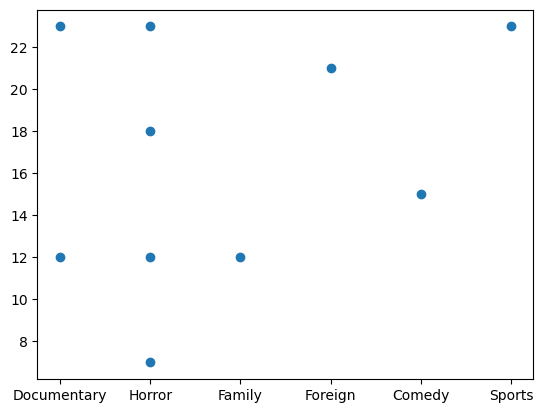

In [50]:
plt.scatter(graphing.genre, graphing.number_of_rentals)

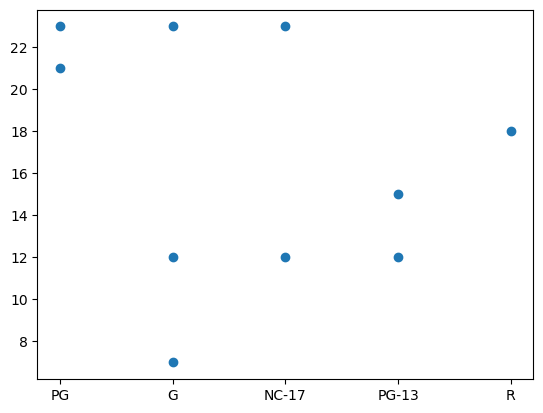

In [52]:
plt.plot(graphing.rating, graphing.number_of_rentals, 'o')

In [53]:
rentals.to_csv(r"C:\Users\amytu\OneDrive\Documents\Tableau\rentals.csv")

In [68]:
staff.to_csv(r"C:\Users\amytu\OneDrive\Documents\Tableau\staff.csv")

In [69]:
actors.to_csv(r"C:\Users\amytu\OneDrive\Documents\Tableau\actors.csv")